# The Econometrics of Time Series Data

#### Overview of Time Series Data
- **Definition**: Time series data involves observations of the same entity at different points in time.
- **Frequency**: Refers to the spacing between observations (e.g., yearly, monthly, daily, hourly).
- **Example**: GDP measured quarterly or yearly.

#### Challenges in Time Series Data
- **Correlation**: Key challenge is to determine how past data points relate to current data, which is crucial for forecasting future trends.
- **Important Metrics**: Examples include GDP, house prices, exchange rates, interest rates, stock prices, unemployment rates, and public debt.

#### Characteristics of Time Series Data
- **Distinction from Cross-Sectional Data**: Unlike cross-sectional data where observations are independent, time series data often exhibits correlation across time.
- **Aggregation Level**: Can vary from individual assets to entire markets or industries.
- **Frequency Variability**: In the modern data landscape, frequency can vary greatly, affecting data structure.

#### Time Series Models
- **Stationary Models**: These models assume that any shock or deviation from the trend will eventually dissipate, indicating no long-term memory in the data.
- **Non-Stationary Models**: Shocks have a lasting effect and the data does not return to a mean, indicating persistence of impact.

#### Time Series Analysis
- **Modeling Approach**: Often empirical, starting from observed data characteristics rather than underlying theoretical models.
- **Graphical Analysis**: Used to intuitively understand data behavior through plots of white noise, trending variables, and random walks.

#### Example Variables and Processes
- **White Noise**: Randomly extracted data with no correlation among observations, mean of zero, and constant variance.
- **Trending Variables**: Show linear trends with fluctuations around the trend; example includes deterministic trends with given growth rates.
- **Random Walk**: A process where each value is a sum of the previous value and a random error, illustrating behaviors seen in financial market prices.

#### Academic Insight
- **Behavioral Analysis**: Examining how variables like GDP or financial returns behave over time can provide insights into economic and financial trends.
- **Forecasting Difficulty**: Non-stationary variables with stochastic trends are challenging to predict due to their deviation from both mean and linear trends.



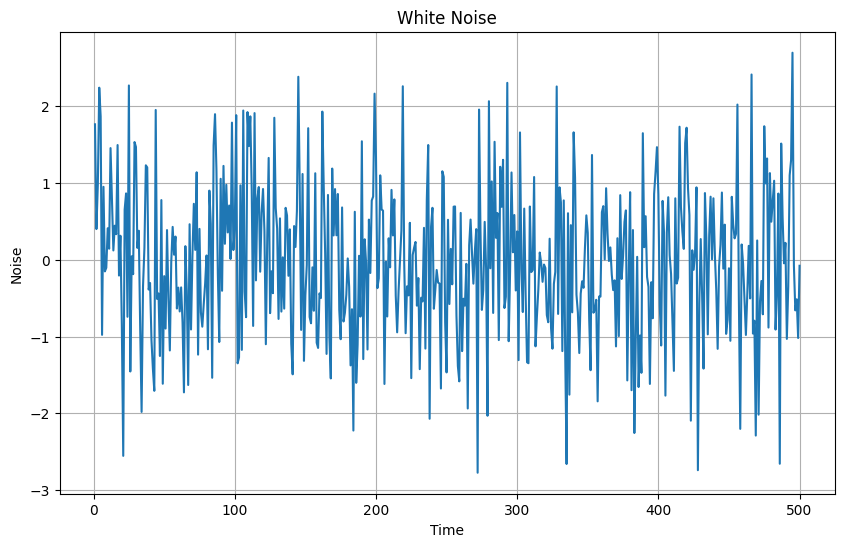

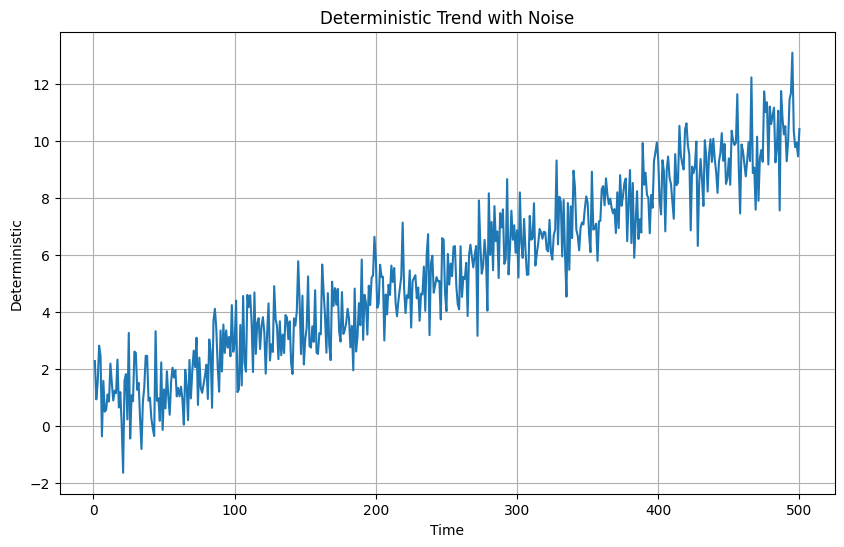

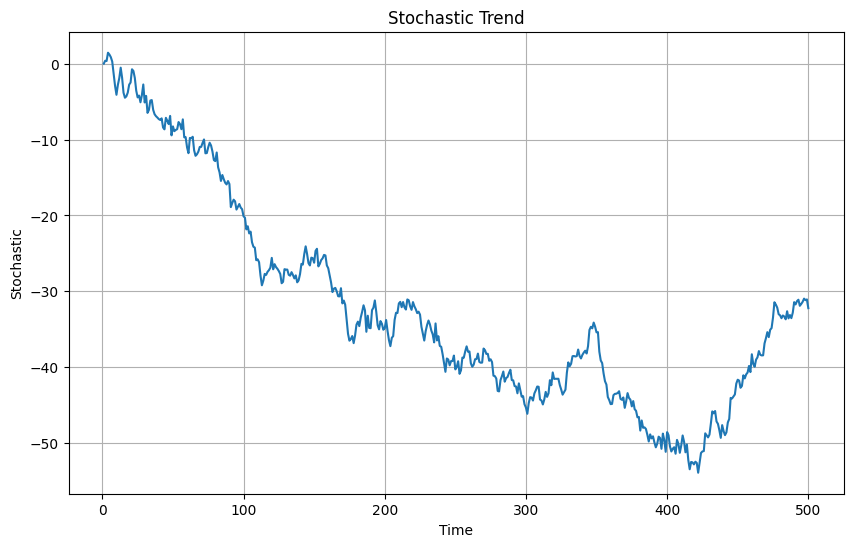

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from scipy.signal import detrend

# Setting up the data
np.random.seed(0)  # for reproducibility
n = np.arange(1, 501)
noise = np.random.normal(0, 1, 500)
white_noise = pd.DataFrame({'n': n, 'noise': noise})


# Plot 1: White Noise
plt.figure(figsize=(10, 6))
plt.plot(white_noise['n'], white_noise['noise'], label='White Noise')
plt.title('White Noise')
plt.xlabel('Time')
plt.ylabel('Noise')
plt.grid(True)
plt.show()

# Plot 2: Deterministic trend with noise
white_noise['deterministic'] = 0.5 + 0.02 * white_noise['n'] + white_noise['noise']
plt.figure(figsize=(10, 6))
plt.plot(white_noise['n'], white_noise['deterministic'], label='Deterministic')
plt.title('Deterministic Trend with Noise')
plt.xlabel('Time')
plt.ylabel('Deterministic')
plt.grid(True)
plt.show()

# Plot 3: Stochastic trend
white_noise['stochastic'] = np.zeros(500)  # Proper initialization
white_noise.loc[0, 'stochastic'] = 0  # Correctly setting the first value
for i in range(1, 500):
    white_noise.loc[i, 'stochastic'] = np.random.normal(0, 1) + white_noise.loc[i-1, 'stochastic']
plt.figure(figsize=(10, 6))
plt.plot(white_noise['n'], white_noise['stochastic'], label='Stochastic')
plt.title('Stochastic Trend')
plt.xlabel('Time')
plt.ylabel('Stochastic')
plt.grid(True)
plt.show()



### Understanding Detrending in Time Series Data

### The Problem of Detrending
Using Ordinary Least Squares (OLS) on non-stationary time series can lead to spurious regressions, which appear fine but are actually biased and inconsistent. We can detrend variables that have either a linearly deterministic trend or a stochastic trend.

#### Detrending Models:
- **Deterministic Trend**: Here, you can forecast the variable using the trend.
- **Stochastic Trend**: In this case, the trend cannot be used for forecasting.

#### How to Detrend:
For a deterministic trending model, like the U.S. economy, you:
1. Fit a linear model $ y_t = \alpha + \beta t + \epsilon_t $,
2. Calculate $ \hat{y}_t = \hat{\alpha} + \hat{\beta} t $,
3. Compute the deviation from the trend $ \hat{\epsilon}_t = y_t - \hat{y}_t $.



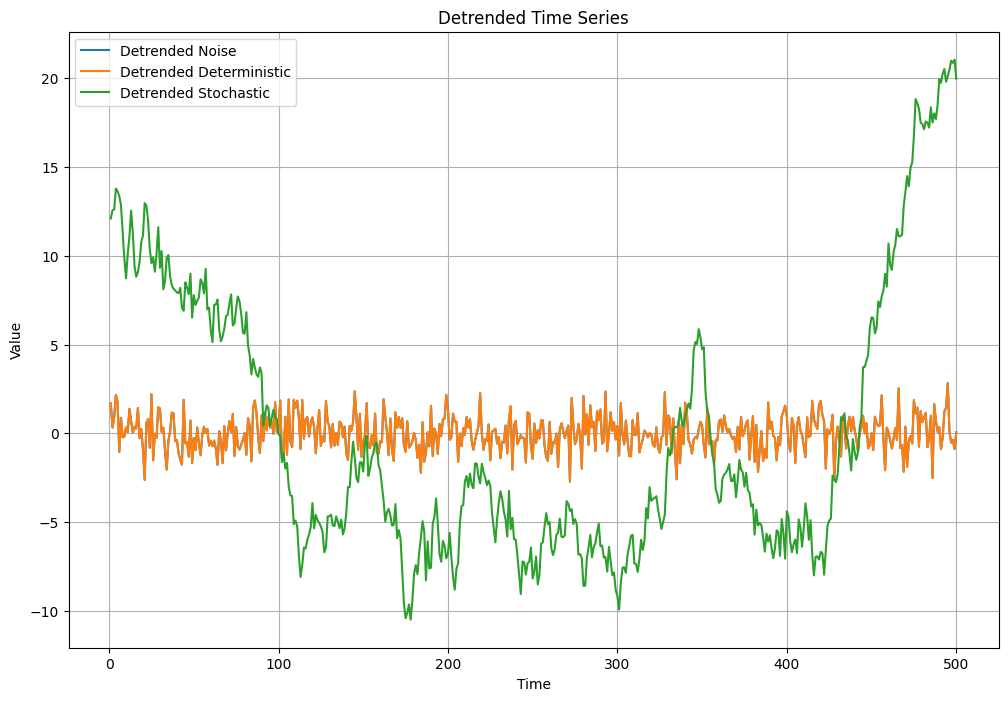

In [3]:
from scipy.signal import detrend
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Detrend the noise, deterministic, and stochastic data
white_noise['noise_d'] = detrend(white_noise['noise'])
white_noise['deterministic_d'] = detrend(white_noise['deterministic'])
white_noise['stochastic_d'] = detrend(white_noise['stochastic'])

# Plot all detrended data
plt.figure(figsize=(12, 8))
plt.plot(white_noise['n'], white_noise['noise_d'], label='Detrended Noise')
plt.plot(white_noise['n'], white_noise['deterministic_d'], label='Detrended Deterministic')
plt.plot(white_noise['n'], white_noise['stochastic_d'], label='Detrended Stochastic')
plt.legend()
plt.title('Detrended Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

## Understanding the Autocorrelation Function in Time Series

### Key Concepts of Autocorrelation
- **Definition**: The autocorrelation function (ACF) measures the correlation between a variable and its past values, considering different lags. It is essential for identifying the "memory" within a time series.
- **Purpose**: The ACF is used to determine how long it takes for the effects of a shock to dissipate in a time series.

### Application of ACF
- **Empirical Use**: ACF is visually represented through a correlogram, which helps to identify the persistence of shocks in the data, not to be confused with major events or breaks.
- **Comparison Example**: The detrended GDP of the US versus Japan showcases different memory characteristics:
  - **US GDP**: Rapidly returns to equilibrium, indicating shorter memory.
  - **Japanese GDP**: Takes longer to return to equilibrium after shocks, indicative of longer memory.

### Theoretical Framework
- **Stationary Process Definition**: A process is termed stationary if it has a constant mean and variance over time and its covariance only depends on the lag between observations, not on the time at which the observations are made.
- **Autocovariance Function**: This function, derived from ACF, adjusts for the units of measurement by normalizing the autocovariance by the variance of the series.

### Building the Autocorrelation Function
- **Visualizing ACF**: By plotting the correlation coefficients against the lag number, you obtain the correlogram.
- **Interpreting ACF**:
  - At lag 0, the autocorrelation is 1 since it's the variance divided by itself.
  - At higher lags, the correlation values decrease if the process is stationary, illustrating the diminishing impact of past values.

### Practical Insights
- **ACF's Role**: ACF helps to understand and quantify how past values of a series influence its future values, fundamental for modeling and forecasting time series.
- **Memory and Persistence**: The extent of ACF stretching without hitting zero reflects the persistence or memory of the time series, crucial for differentiating between processes like white noise (no memory) and processes with significant autocorrelation.

### Individual Significance Testing
- **Overview**: Testing the significance of autocorrelation coefficients involves estimating these coefficients and assessing their deviation from zero.
- **Methodology**:
  - Use a standard t-statistic approach to test each autocorrelation coefficient.
  - Construct confidence intervals for these tests. Coefficients are considered non-significant if they lie within the interval:
    $$
    -t_{T-2;α} * SE(τ̂) ≤ τ̂ ≤ +t_{T-2;α} * SE(τ̂)
    $$
  - Where $SE$ is the standard error, and $t_{T-2;α}$ is the critical value from the t-distribution for $T-2$ degrees of freedom and significance level $α$.

### Significance Levels and Confidence Intervals
- **Approximation**: The autocorrelation coefficients (τs) are assumed to follow an approximate normal distribution $N(0, 1/T)$, where $T$ is the sample size.
- **95% Confidence Interval**: At $T=100$, the interval is $±1.96 * 1/√T$.

### Example of Testing Coefficients
- **Given Coefficients**: τ1 = 0.207, τ2 = -0.013, τ3 = 0.086, τ4 = 0.005, τ5 = -0.022.
- **Statistical Testing**: A coefficient is significant if it lies outside the interval (-0.196, +0.196) at the 5% significance level. In this example, only τ1 = 0.207 is statistically significant.

### Joint Significance Testing with Q-Statistic
- **Box and Pierce Q-Statistic**:
  - Formula: $Q = T * Σ (τ̂k^2) from k=1 to m$
  - Distribution: Asymptotically distributed as a chi-square (χ²) with $m$ degrees of freedom, where $m$ is the maximum lag length.
- **Calculation**:
  - For T=100 and lags up to 5: Q = 100 * [0.043 + 0.00017 + 0.0074 + 0.000025 + 0.000484] = 5.10.
- **Chi-Square Critical Values**:
  - At 5% significance level (α), the critical value is 11.1.
  - At 1% significance level (α), the critical value is 15.1.
- **Conclusion**: Cannot reject the null hypothesis that all autocorrelation coefficients are jointly zero based on the Box-Pierce test result.

### Ljung-Box Statistic
- **Enhanced Q-Statistic**:
  - Adjusted for small sample sizes to be more conservative.
  - Formula: $Q* = T * (T+2) * Σ [τ̂k^2 / (T-k)] from k=1 to m$
  - Calculation for the same data yields Q* = 5.26.
- **Comparison to Chi-Square Distribution**:
  - With 5 degrees of freedom, both Q and Q* statistics do not exceed the critical value of 11.1 at the 5% level, indicating that the coefficients are jointly insignificant.

### Conclusion
- **Implication**: These tests are crucial for determining the reliability of autocorrelation coefficients in time series analysis, particularly in distinguishing signal from noise and in building robust forecasting models.


## The Partial Autocorrelation Function (PACF)

### Introduction to PACF
- **Purpose**: The Partial Autocorrelation Function (PACF) is crucial for distinguishing the type of data generating process, particularly in deciding between different time series models.
- **Definition**: PACF measures the correlation between an observation at a current time and its value at a previous time (lag), controlling for all the intermediate values. This helps isolate the direct effect of past values on current values.

### Relationship Between ACF and PACF
- **Comparison**: PACF is used alongside the Autocorrelation Function (ACF) to identify the appropriate time series model for forecasting.
- **Model Selection**: By examining both ACF and PACF, analysts can choose the most suitable model—whether it requires using autoregressive terms, moving averages, or a combination.

### Practical Use of PACF
- **Forecasting**: PACF helps in estimating the model that will be used for forecasting future values.
- **Statistical Significance**: It is also used to test the statistical significance of lags to determine their relevance in the model.

### Theoretical Insight
- **Lag Consideration**:
  - At lag 1, the autocorrelation and partial autocorrelation coefficients are equal because there are no intermediate effects to consider.
  - For lag 2, the PACF adjusts the autocorrelation by removing the influence of the first lag.
- **Complexity at Higher Lags**: Beyond two lags, the calculation of PACF becomes complex and requires more sophisticated statistical methods not covered in basic courses.

### PACF in Time Series Analysis
- **Autoregressive Process**: For an autoregressive model of order $p$, PACF will show significant correlations for lags up to $p$ and then drop off, indicating no direct correlation beyond that point.
- **Moving Average Process**: PACF for a moving average process typically cuts off after the order of the moving average, providing a clear demarcation in the correlogram.

### Graphical Representations
- PACF is often depicted through correlograms which visually demonstrate the correlation of an observation with its lags, adjusted for the contributions of all intermediate observations.

### Conclusion
- **Decision-Making Tool**: PACF, along with ACF, forms the foundation for selecting the appropriate forecasting models in time series analysis. It aids in understanding the memory and direct dependencies in the series, crucial for building accurate predictive models.


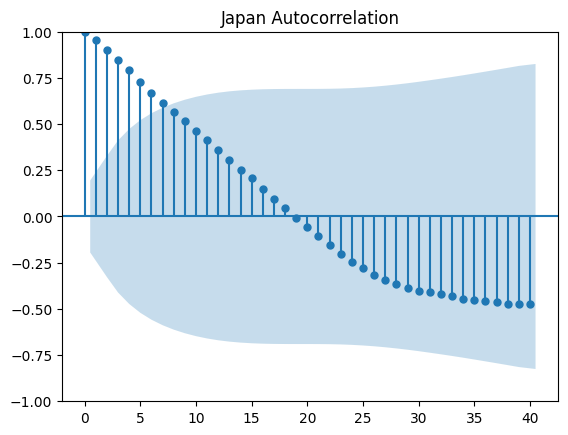

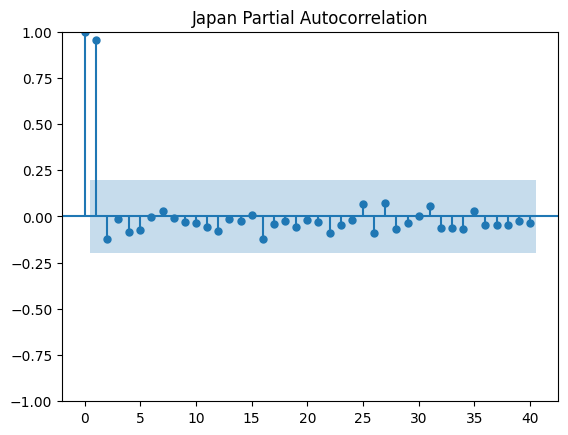

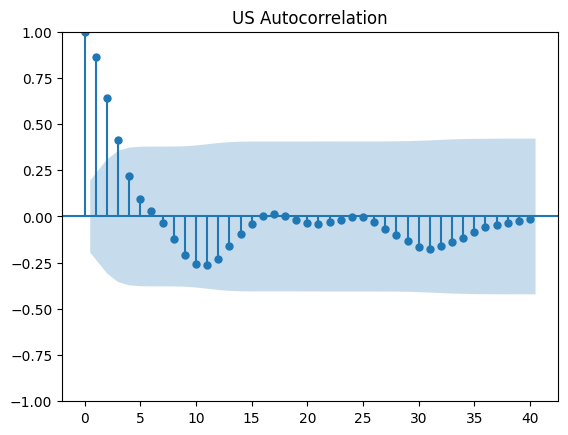

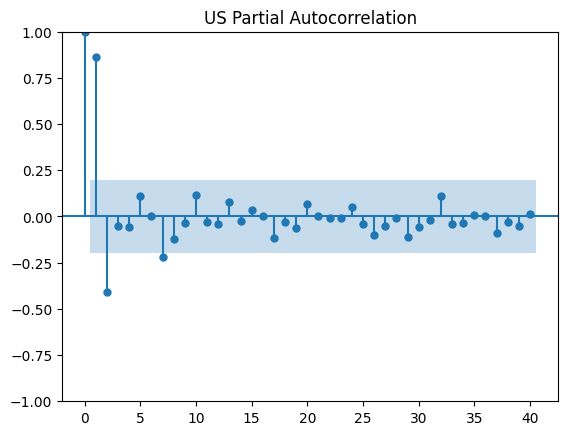

In [4]:
df = pd.read_excel("data/datajapanus.xlsx")
df['lnJapan'] = np.log(df['Japan'])
df['lnUS'] = np.log(df['US'])
df['lnJapan_d'] = detrend(df['lnJapan'])
df['lnUS_d'] = detrend(df['lnUS'])


plot_acf(df['lnJapan_d'], lags=40, title = "Japan Autocorrelation")
plt.show()
plot_pacf(df['lnJapan_d'], lags=40, title = "Japan Partial Autocorrelation")
plt.show()
plot_acf(df['lnUS_d'], lags=40, title = "US Autocorrelation")
plt.show()
plot_pacf(df['lnUS_d'], lags=40, title= "US Partial Autocorrelation")
plt.show()

## Stationary Time Series Models Overview

### Introduction to Stationary Models
- **Purpose**: Stationary time series models are utilized to model variables that tend to revert to a long-run equilibrium following a shock.
- **Types of Models**: We focus on models categorized by their autocorrelation functions, particularly the exponential type which shows decay towards zero after a shock.

### Autocorrelation Functions
- **Exponential Autocorrelation Functions**:
  - Behavior: These functions show that autocorrelations decay towards zero at varying speeds after a shock, indicating a return to equilibrium.
- **Other Types**:
  - **Hyperbolic Autocorrelation Functions**: Tend rapidly towards equilibrium but do not stabilize, reflecting persistent effects of shocks.
  - **Non-linear Autocorrelation Functions**: Variables initially deviate from equilibrium before rapidly correcting.
  - **Non-monotonic Autocorrelation Functions**: After a shock, variables quickly revert to equilibrium but continue to fluctuate indefinitely.

### Stationary Time Series Models
- **White Noise Models**:
  - Characteristics: No memory in the system, meaning past values do not influence future values.
  - Definition: A white noise process has a mean of zero, constant variance, and zero covariance for any lag greater than one.
- **Moving Average Models (MA(q))**:
  - Structure: These models express the current value of the series as a function of the current and past random shocks up to $q$ lags.
  - Example: $Y_t = μ + Θ_1 u_{t-1} + Θ_2 u_{t-2} + ... + Θ_q u_{t-q} + u_t$.
- **Autoregressive Models (AR(p))**:
  - Structure: The current value is dependent on its own previous values up to $p$ lags plus a random shock.
  - Example: $Y_t = μ + ρ_1 Y_{t-1} + ρ_2 Y_{t-2} + ... + ρ_p Y_{t-p} + u_t$.
- **Autoregressive Moving Average Models (ARMA(p, q))**:
  - Combination: Incorporates both AR and MA components, allowing the model to include the effects of past values and past errors on the current value.

### Theoretical Basis
- **Covariance Stationarity**:
  - Definition: A time series is covariance stationary if it satisfies three conditions—constant mean, constant variance, and covariance that depends only on the lag between observations and not on the actual time at which they are measured.

### Practical Application
- **Model Selection**:
  - Based on the empirical behavior of the autocorrelation and partial autocorrelation functions, analysts choose the appropriate model to best capture the dynamics of the series.
  - Importance: These models are critical for forecasting as they provide a structured way to predict future values based on the understood behavior of the series.


c:\Users\moeth\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\moeth\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MA1_Japan Model Summary:
                               SARIMAX Results                                
Dep. Variable:              lnJapan_d   No. Observations:                  101
Model:                 ARIMA(0, 0, 1)   Log Likelihood                  26.486
Date:                Sat, 18 Jan 2025   AIC                            -46.971
Time:                        16:40:44   BIC                            -39.126
Sample:                             0   HQIC                           -43.795
                                - 101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.049      0.038      0.970      -0.095       0.099
ma.L1          0.8627      0.040     21.587      0.000       0.784       0.941
sigma2         0.0342      

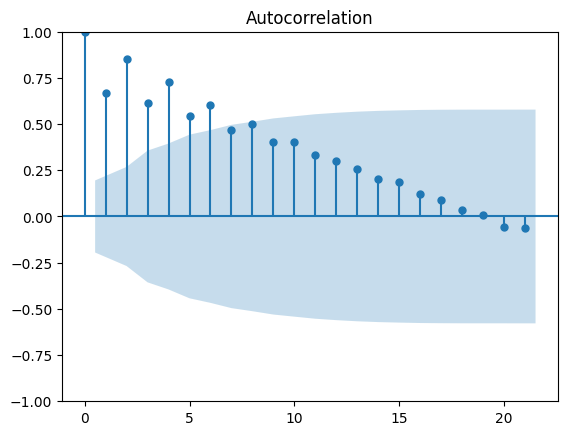

ACF Plot for MA1_US:


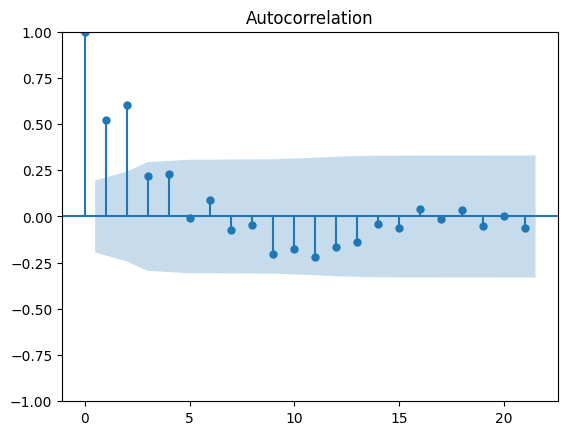

ACF Plot for AR1_Japan:


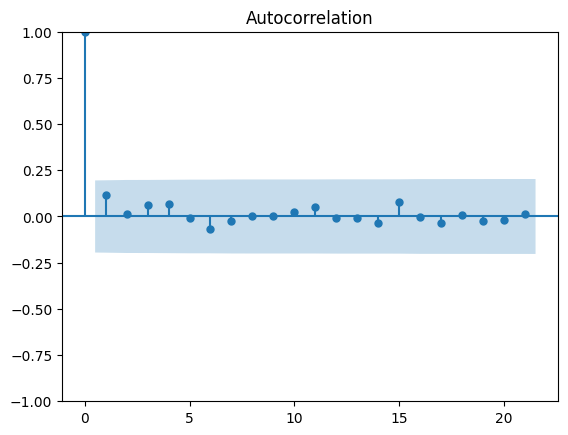

ACF Plot for AR1_US:


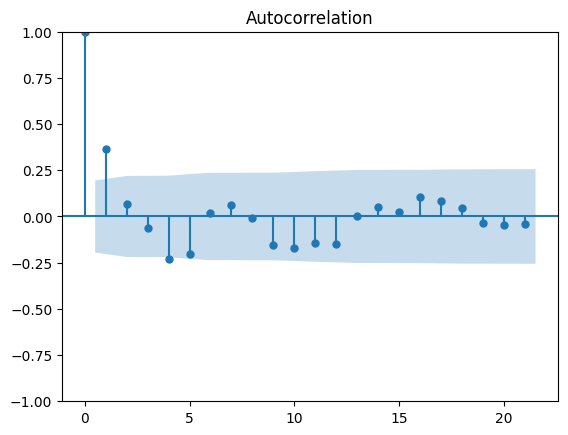

ACF Plot for AR2_Japan:


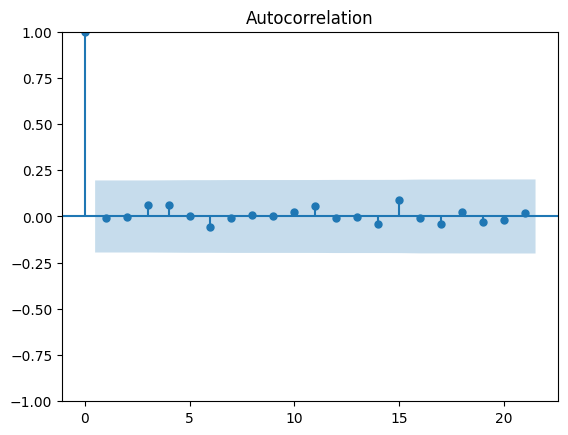

ACF Plot for AR2_US:


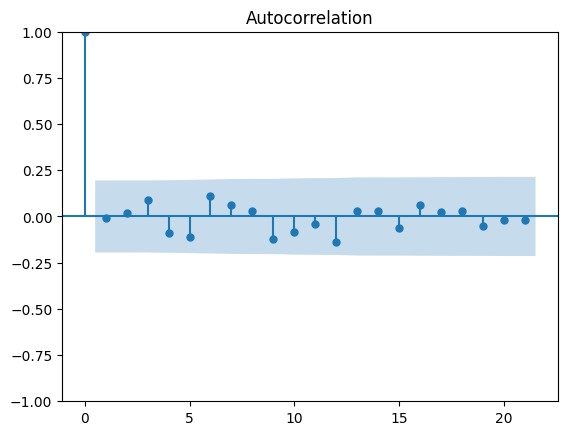

ACF Plot for ARMA_Japan:


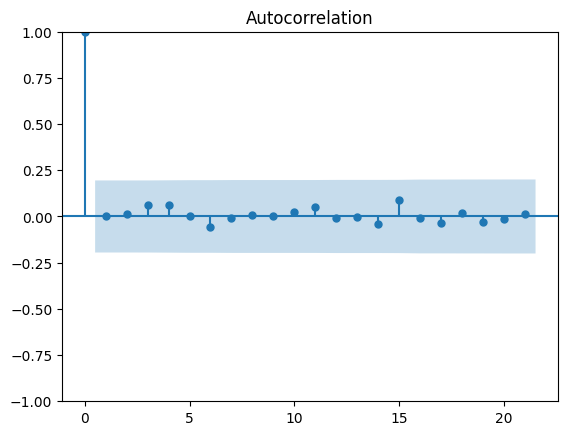

ACF Plot for ARMA_US:


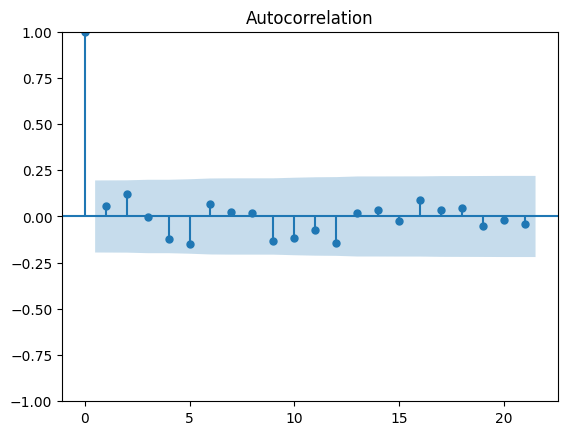

In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("data/datajapanus.xlsx")

# Transform the data into ln
df['lnJapan'] = np.log(df['Japan'])
df['lnUS'] = np.log(df['US'])

# Detrend the two series
from scipy.signal import detrend
df['lnJapan_d'] = detrend(df['lnJapan'])
df['lnUS_d'] = detrend(df['lnUS'])

# Models
models = {
    'MA1_Japan': ARIMA(df['lnJapan_d'], order=(0, 0, 1)),
    'MA1_US': ARIMA(df['lnUS_d'], order=(0, 0, 1)),
    'AR1_Japan': ARIMA(df['lnJapan_d'], order=(1, 0, 0)),
    'AR1_US': ARIMA(df['lnUS_d'], order=(1, 0, 0)),
    'AR2_Japan': ARIMA(df['lnJapan_d'], order=(2, 0, 0)),
    'AR2_US': ARIMA(df['lnUS_d'], order=(2, 0, 0)),
    'ARMA_Japan': ARIMA(df['lnJapan_d'], order=(1, 0, 1)),
    'ARMA_US': ARIMA(df['lnUS_d'], order=(1, 0, 1))
}

results = {}
for name, model in models.items():
    results[name] = model.fit()
    print(f"{name} Model Summary:")
    print(results[name].summary())

# Plot ACF of residuals
for name, result in results.items():
    print(f"ACF Plot for {name}:")
    plot_acf(result.resid)
    plt.show()

# # Generating random series
# np.random.seed(0)
# y1 = [np.random.normal(0, 1)]
# e = [np.random.normal(0, 1)]
# mu = np.random.normal(0, 1)
# y2 = [y1[0]]

# for i in range(1, 500):
#     e.append(np.random.normal(0, 1))
#     y1.append(y1[-1] + e[-1])
#     y2.append(mu + y2[-1] + e[-1])

# # Create DataFrame
# dfy = pd.DataFrame({
#     'n': np.arange(1, 501),
#     'y1': y1,
#     'y2': y2,
#     'e': e
# })

# # Plot the series
# plt.figure(figsize=(12, 8))
# plt.subplot(3, 1, 1)
# plt.plot(dfy['n'], dfy['y1'], label='y1')
# plt.title('Series y1')
# plt.grid(True)

# plt.subplot(3, 1, 2)
# plt.plot(dfy['n'], dfy['y2'], label='y2')
# plt.title('Series y2')
# plt.grid(True)

# plt.subplot(3, 1, 3)
# plt.plot(dfy['n'], dfy['e'], label='e')
# plt.title('Series e')
# plt.grid(True)

# plt.tight_layout()
# plt.show()


## From Theoretical ACF to Empirical Model Specification

### Overview
- **Challenge**: The main challenge in specifying time series models, especially compared to cross-sectional data, is the largely empirical nature of model selection. Theoretical guidance is minimal, often leading to a trial and error approach in determining the best model.
- **Role of ACF and PACF**: These functions are instrumental in deciding the type of time series model to employ based on the behavior of the autocorrelations observed empirically.

### Model Behaviors Based on ACF and PACF
- **White Noise Process**:
  - ACF: Zero after lag 0
  - PACF: Zero after lag 0
- **Autoregressive Process (AR)**:
  - ACF: Geometrically decays
  - PACF: Number of spikes equals the order of the AR process
- **Moving Average Process (MA)**:
  - ACF: Number of spikes equals the order of the MA process
  - PACF: Geometrically decays
- **ARMA Process**:
  - ACF: Geometrically decays
  - PACF: Geometrically decays

### Detailed Model Analysis
- **MA(1) Model Example**:
  - `yt = -0.5ut-1 + ut`
  - Behavior: ACF shows a single spike; PACF declines rapidly to zero.
- **MA(2) Model Example**:
  - `yt = -0.5ut-1 + 0.25ut-2 + ut`
  - Behavior: ACF has two spikes before dropping to zero; PACF tends to zero slowly.

### AR(p) Model Analysis
- **Simple AR(1) Model**:
  - `yt = 0.9yt-1 + ut`
  - Behavior: ACF tends to zero; PACF shows a single spike, reflecting the single lag in the model.
- **Less Persistent AR(1) Model**:
  - `yt = 0.5yt-1 + ut`
  - Behavior: Similar to the previous AR(1) but the ACF decays to zero more rapidly.
- **Negative Coefficient AR(1) Model**:
  - `yt = -0.5yt-1 + ut`
  - Behavior: PACF shows a spike then decays, ACF tends to zero indicating the impact of the negative coefficient.

### ARMA Model Example
- **Simple ARMA(1,1) Model**:
  - `yt = 0.5yt-1 + 0.5ut-1 + ut`
  - Behavior: Both ACF and PACF decay smoothly to zero, indicating mixed AR and MA behaviors.

### Systematic Approach to Model Specification: Box and Jenkins Method
- **Step 1: Identification**
  - Determine the model order using graphical procedures or information criteria.
- **Step 2: Estimation**
  - Estimate parameters using techniques like least squares or maximum likelihood.
- **Step 3: Model Diagnostic Checking**
  - Evaluate the model fit using residual diagnostics and information criteria:
    - **Akaike's Information Criterion (AIC)**
    - **Schwarz's Bayesian Criterion (SBIC)**
    - **Hannan-Quinn Criterion (HQIC)**
  - These criteria help minimize the residual variance while penalizing the complexity of the model, aiding in selecting the most appropriate model.



c:\Users\moeth\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:              lnJapan_d   No. Observations:                  101
Model:                 ARIMA(0, 0, 1)   Log Likelihood                  26.486
Date:                Sat, 18 Jan 2025   AIC                            -46.971
Time:                        16:40:47   BIC                            -39.126
Sample:                             0   HQIC                           -43.795
                                - 101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.049      0.038      0.970      -0.095       0.099
ma.L1          0.8627      0.040     21.587      0.000       0.784       0.941
sigma2         0.0342      0.004      8.536      0.0

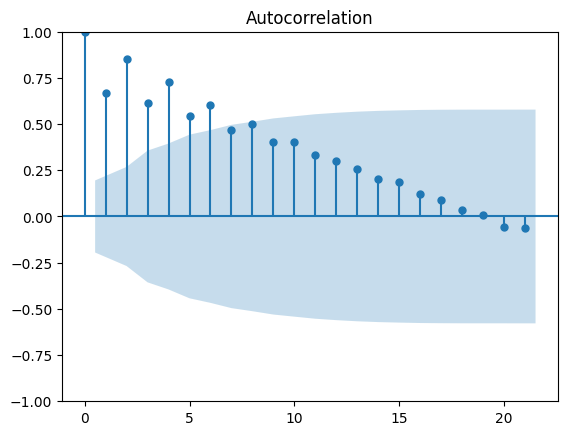

c:\Users\moeth\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                 lnUS_d   No. Observations:                  101
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 124.622
Date:                Sat, 18 Jan 2025   AIC                           -243.243
Time:                        16:40:48   BIC                           -235.398
Sample:                             0   HQIC                          -240.067
                                - 101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.709e-05      0.014      0.006      0.995      -0.027       0.027
ma.L1          0.7956      0.058     13.612      0.000       0.681       0.910
sigma2         0.0049      0.000      9.913      0.0

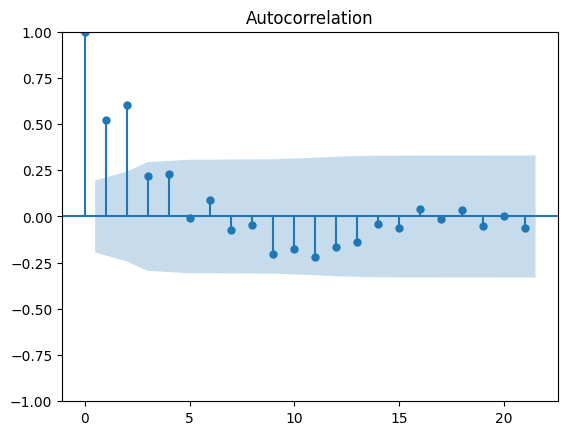

                               SARIMAX Results                                
Dep. Variable:              lnJapan_d   No. Observations:                  101
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 105.318
Date:                Sat, 18 Jan 2025   AIC                           -204.636
Time:                        16:40:48   BIC                           -196.790
Sample:                             0   HQIC                          -201.460
                                - 101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0799      0.238      0.336      0.737      -0.387       0.546
ar.L1          0.9626      0.069     13.892      0.000       0.827       1.098
sigma2         0.0071      0.000     14.557      0.0

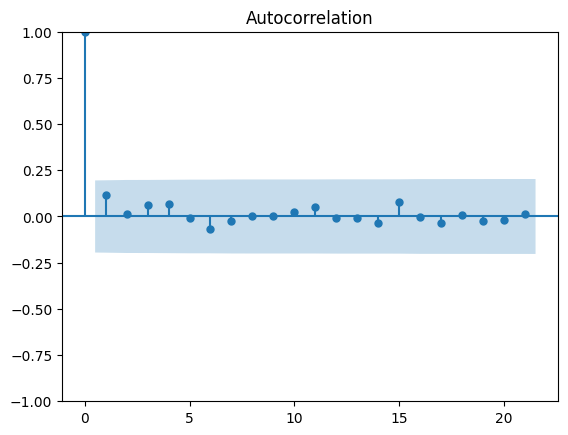

                               SARIMAX Results                                
Dep. Variable:                 lnUS_d   No. Observations:                  101
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 148.866
Date:                Sat, 18 Jan 2025   AIC                           -291.732
Time:                        16:40:48   BIC                           -283.887
Sample:                             0   HQIC                          -288.556
                                - 101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0067      0.041      0.161      0.872      -0.074       0.088
ar.L1          0.8604      0.033     25.985      0.000       0.795       0.925
sigma2         0.0030      0.000     10.689      0.0

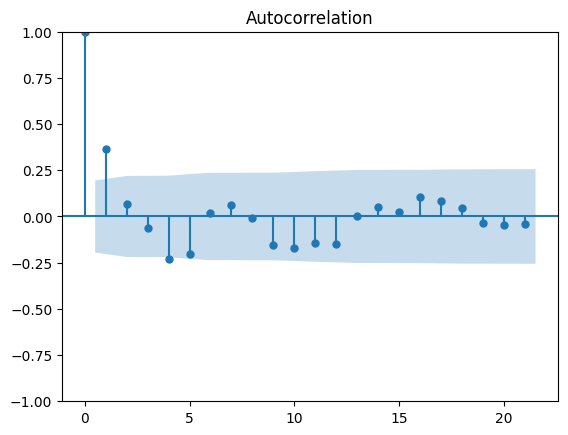

                               SARIMAX Results                                
Dep. Variable:              lnJapan_d   No. Observations:                  101
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 106.366
Date:                Sat, 18 Jan 2025   AIC                           -204.732
Time:                        16:40:49   BIC                           -194.272
Sample:                             0   HQIC                          -200.498
                                - 101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0653      0.224      0.291      0.771      -0.375       0.505
ar.L1          1.1008      0.090     12.255      0.000       0.925       1.277
ar.L2         -0.1431      0.121     -1.182      0.2

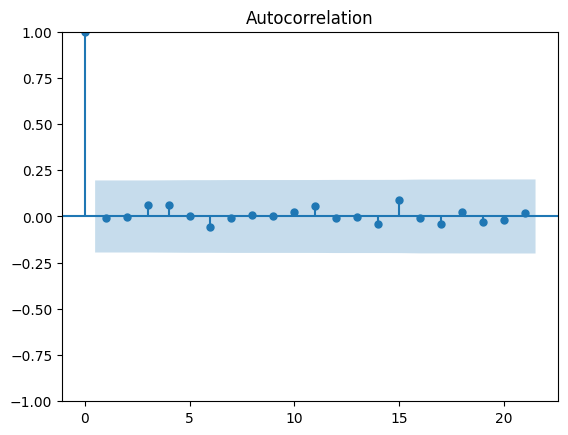

                               SARIMAX Results                                
Dep. Variable:                 lnUS_d   No. Observations:                  101
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 158.147
Date:                Sat, 18 Jan 2025   AIC                           -308.293
Time:                        16:40:49   BIC                           -297.833
Sample:                             0   HQIC                          -304.058
                                - 101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.028      0.048      0.962      -0.053       0.056
ar.L1          1.2171      0.069     17.656      0.000       1.082       1.352
ar.L2         -0.4108      0.068     -6.082      0.0

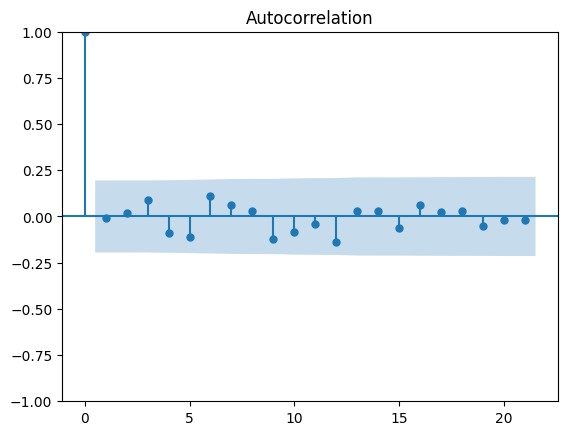

                               SARIMAX Results                                
Dep. Variable:              lnJapan_d   No. Observations:                  101
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 106.257
Date:                Sat, 18 Jan 2025   AIC                           -204.514
Time:                        16:40:50   BIC                           -194.053
Sample:                             0   HQIC                          -200.279
                                - 101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0682      0.227      0.301      0.763      -0.376       0.513
ar.L1          0.9533      0.075     12.640      0.000       0.806       1.101
ma.L1          0.1341      0.138      0.973      0.3

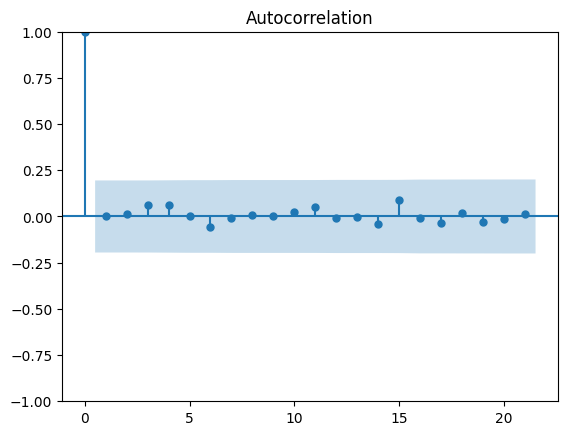

                               SARIMAX Results                                
Dep. Variable:                 lnUS_d   No. Observations:                  101
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 156.321
Date:                Sat, 18 Jan 2025   AIC                           -304.643
Time:                        16:40:50   BIC                           -294.182
Sample:                             0   HQIC                          -300.408
                                - 101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.035      0.095      0.924      -0.065       0.071
ar.L1          0.7788      0.051     15.411      0.000       0.680       0.878
ma.L1          0.3964      0.097      4.102      0.0

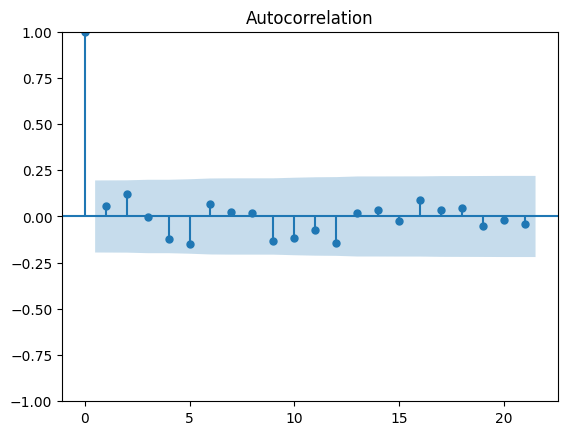

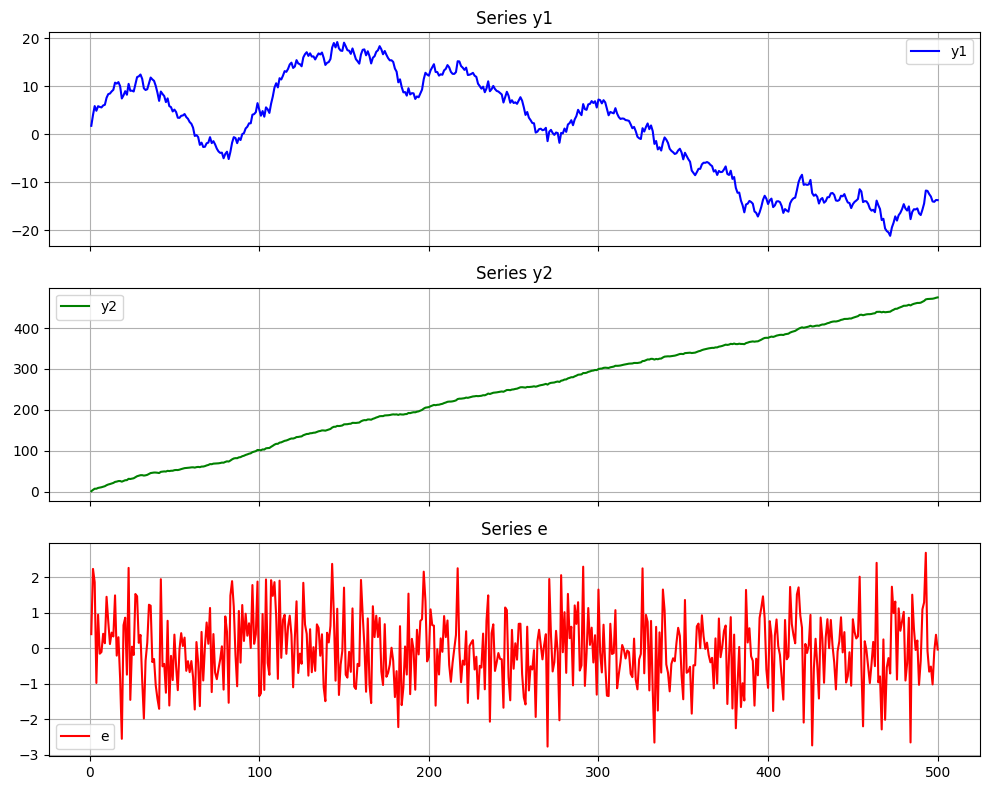

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from scipy.signal import detrend

# Load data
df = pd.read_excel("data/datajapanus.xlsx")

# Transform the data into natural logarithm
df['lnJapan'] = np.log(df['Japan'])
df['lnUS'] = np.log(df['US'])

# Detrend the series
df['lnJapan_d'] = detrend(df['lnJapan'])
df['lnUS_d'] = detrend(df['lnUS'])

# Function to fit model and plot ACF of residuals
def fit_and_plot_acf(series, order):
    model = ARIMA(series, order=order)
    results = model.fit()
    print(results.summary())
    residuals = results.resid
    plot_acf(residuals)
    plt.show()

# Fitting MA(1), AR(1), AR(2), and ARMA(1, 1) models
fit_and_plot_acf(df['lnJapan_d'], (0, 0, 1))
fit_and_plot_acf(df['lnUS_d'], (0, 0, 1))
fit_and_plot_acf(df['lnJapan_d'], (1, 0, 0))
fit_and_plot_acf(df['lnUS_d'], (1, 0, 0))
fit_and_plot_acf(df['lnJapan_d'], (2, 0, 0))
fit_and_plot_acf(df['lnUS_d'], (2, 0, 0))
fit_and_plot_acf(df['lnJapan_d'], (1, 0, 1))
fit_and_plot_acf(df['lnUS_d'], (1, 0, 1))

# Generating random series
np.random.seed(0)
y1 = [np.random.normal()]
e = [np.random.normal()]
mu = np.random.normal()

for i in range(1, 500):
    new_e = np.random.normal()
    e.append(new_e)
    y1.append(y1[-1] + new_e)

y2 = [y1[0]]
for i in range(1, 500):
    y2.append(mu + y2[-1] + e[i])

# Create DataFrame for plotting
dfy = pd.DataFrame({'n': range(1, 501), 'y1': y1, 'y2': y2, 'e': e})

# Plotting the series
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
axes[0].plot(dfy['n'], dfy['y1'], label='y1', color='blue')
axes[0].set_title('Series y1')
axes[1].plot(dfy['n'], dfy['y2'], label='y2', color='green')
axes[1].set_title('Series y2')
axes[2].plot(dfy['n'], dfy['e'], label='e', color='red')
axes[2].set_title('Series e')
for ax in axes:
    ax.legend()
    ax.grid(True)
plt.tight_layout()
plt.show()


## Forecasting Overview
Forecasting is a crucial aspect of econometric analysis, focusing on using past information to predict future observations. It tests the adequacy of models in predicting future events such as market returns, housing prices, portfolio riskiness, and bond volatility.

### Types of Forecasting
- **Econometric Structural Forecasting**: Relies on the relationships between variables. It uses models built on economic theory to predict future values based on independent variables.
- **Time Series Forecasting**: Utilizes historical data points of a series to forecast future values based on models like ARIMA, GARCH, and others.

### In-Sample vs. Out-of-Sample Forecasting
- **In-Sample Forecasting**: Tests how well the model fits within the data used to estimate it.
- **Out-of-Sample Forecasting**: Uses a portion of the data to validate the model's accuracy beyond the estimation sample.

### Structural Forecasting
This method predicts future values by relating a dependent variable to one or more independent variables, often guided by economic theory. Examples include models predicting unemployment rates or testing economic theories like uncovered interest parity.

### Time Series Forecasting
In time series forecasting, future values are predicted based solely on past values of the series and error terms. This method often does not rely on economic theory but on statistical properties of the data.
- Non-Linear Models: account for changes in relationships between variables over time, which are not proportionate or linear.
-  Threshold Models: involve parameters that change at predefined values of an explanatory variable. These models are useful for capturing abrupt changes or different regimes in data.
-  GARCH Models: used primarily to study financial time series where volatility (variance) clusters over time.
- Bilinear Models: a form of non-linear model where the current value of the series is a linear function of past values and past errors, and the product of past values and past errors.

### Forecasting Techniques
- **Point Forecasts**: Predict a single future value.
- **Interval Forecasts**: Predict a range within which future values are likely to lie, offering a confidence level.

### Steps in Forecasting
1. **Identification**: Determining the appropriate model order and parameters.
2. **Estimation**: Using techniques like least squares or maximum likelihood to estimate model parameters.
3. **Diagnostic Checking**: Assessing the model's accuracy using residual diagnostics.

### Forecasting with Econometric Models
Models can range from simple averages to complex arrangements involving autoregressive terms and moving averages:
- **Structural Models**: Typically linear regressions with one or more predictors.
- **Time Series Models**: Involve dependencies solely on past values and error terms, such as ARIMA or GARCH models.

### Forecast Accuracy Measures
- **Mean Squared Error (MSE)**: Measures the average of the squares of the errors between forecasted and actual values.
- **Mean Absolute Error (MAE)**: Averages the absolute differences between predictions and actual outcomes.
- **Minimum Absolute Percentages (MAPE)**: Provides a percentage measure of error relative to actual values.

### Multi-Step and Single Step Ahead Forecasting
- **Single Step Ahead**: Predicts one future point from the current data.
- **Multi-Step Ahead**: Forecasts several future points, potentially increasing forecast error with the horizon length.

### Recursive vs. Rolling Window Approaches
- **Recursive Forecasting**: Involves expanding the sample size by adding one observation at a time.
- **Rolling Window Forecasting**: Keeps the sample size constant but rolls the start and end points forward.

These forecasting methods and models provide a toolkit for predicting future events in various economic and financial contexts, utilizing both structural insights and time series behaviors.


# Time Series Modelling and Non-Stationarity

## Overview
- **Stationary Variables**: Variables that tend to return to an equilibrium level after experiencing a shock. The memory of the shock fades over time.
- **Non-Stationary Variables**: Variables that have infinite memory where the effects of shocks accumulate over time. These do not tend to return to a mean or deterministic trend.

## Definitions
- **Stationary**: After a shock, the series will return to its mean; the impact of shocks diminishes over time.
- **Trend Stationary**: Series with a deterministic trend that become stationary once the trend is removed.
- **Non-Stationary**: Shocks do not dissipate; their impact remains indefinitely, making the series nonstationary or stochastic in trend.

## Mathematical Model: AR(1) without Drift
- **Equation 1**: $ y_t = \rho y_{t-1} + u_t $
- **Equation 2**: $ y_{t-1} = \rho y_{t-2} + u_{t-1} $
- **Equation 3**: $ y_{t-2} = \rho y_{t-3} + u_{t-2} $

### Substitutions and Implications
- **Substituting Equation 2 into 1**: $ y_t = \rho^2 y_{t-2} + \rho u_{t-1} + u_t $
- **Further Substitution**: $ y_t = \rho^3 y_{t-3} + \rho^2 u_{t-2} + \rho u_{t-1} + u_t $

### Impact of $\rho$
- **$\rho < 1$**: Shocks' impact decreases over time; variable is stationary.
- **$\rho = 1$**: Shocks' impacts do not fade, cumulating over time; variable has infinite memory.
- **$\rho > 1$**: Shocks' impacts increase over time; typically not considered in economic models due to unrealistic implications.

## Special Cases
- **Random Walk with Drift**: $ y_t = \mu + \rho y_{t-1} + u_t $ where $\rho = 1$.
- **Deterministic Trend Process**: $ y_t = \alpha + \beta t + u_t $.



# Understanding Non-Stationarity in Time Series Data

## Introduction to Non-Stationarity
- **Non-stationary Variables**: Variables that do not return to a mean after a shock; their impacts accumulate over time, creating infinite memory.

## Key Concepts and Definitions
- **Random Walk with Drift**: $ y_t = \mu + y_{t-1} + u_t $, where the parameter from the past variable $ y_{t-1} $ is set to one, indicating no return to mean.
- **Trend-Stationary Process**: $ y_t = \alpha + \beta t + u_t $, which is stationary around a trend. Once detrended, the series becomes stationary.

## Characterization and Types of Non-Stationarity
- **Stochastic Non-Stationarity**: First-differencing $ \Delta y_t = y_t - y_t{-1} $ can induce stationarity, converting a non-stationary series into a stationary one.
- **Integrated Series**: A series is said to be integrated of order $ d $ (notated as $ I(d) $) when it needs to be differenced $ d $ times to become stationary.

### Levels of Integration
- **I(0)**: Stationary series, no differencing needed.
- **I(1)**: Contains one unit root; needs one differencing to induce stationarity.
- **I(2)**: Contains two unit roots; requires two differencings.

## Importance of Dealing with Non-Stationarity
- **Impact on Analysis**: Non-stationary data can lead to spurious regression results, where the memory in the series is misinterpreted as a significant correlation.
- **Implications for Policy**: Incorrect analyses can lead to misguided policy decisions.
- **Asymptotic Assumptions**: Standard assumptions for asymptotic analysis do not hold for non-stationary series, affecting statistical tests like $ t $-tests and $ F $-tests.

## Mathematical Representation
- **Stochastic Trend Model Simplified**: $ y_t = y_{t-1} + u_t $ or $ \Delta y_t = u_t $.
- **Complex Integration Example**: $ y_t = 2y_{t-1} - y_{t-2} + u_t $, which shows a series with two unit roots requiring two differencings.

## Practical Application
- **Generating Data**: Suggestion to use tools like Excel or R to simulate non-stationary time series data to understand the concept better.


# Testing for Non-Stationarity: The Dickey-Fuller and Augmented Dickey-Fuller Tests

## Objective
- Determine if $ \rho $ is equal to 1, indicating a non-stationary series, or less than 1, indicating a stationary series.

## Importance of Testing Non-Stationarity
- **Influence on Series Behavior**: Non-stationary series can have infinite memory, leading to persistent effects from shocks.
- **Spurious Regression**: Occurs when non-stationary variables are regressed, resulting in misleading high $ R^2 $ values even for unrelated variables.
- **Statistical Issues**: Non-stationary series violate standard assumptions of regression, affecting hypothesis testing and leading to invalid conclusions.

## The Dickey-Fuller Test
- **Model**: $ y_t = \rho y_{t-1} + u_t $
- **Null Hypothesis ( $ H_0 $ )**: $ \rho = 1 $ (unit root, non-stationary)
- **Alternative Hypothesis ( $ H_1 $ )**: $ \rho < 1 $ (stationary)
- **Transformation for Testing**: Take first differences to eliminate non-stationarity:
  $$
  \Delta y_t = (\rho - 1) y_{t-1} + u_t = \psi y_{t-1} + u_t
  $$
  where $ \psi = \rho - 1 $.
- **Test Statistic**: $ t $-ratio of $ \hat{\psi} $ divided by its standard error. Critical values provided by Fuller (1976) are more conservative due to the non-standard distribution under $ H_0 $.

## Augmented Dickey-Fuller Test
- **Purpose**: Adjust for autocorrelation by including $ p $ lags of the dependent variable in the regression model.
- **Model**:
  $$
  \Delta y_t = \psi y_{t-1} + \sum_{i=1}^p \alpha_i \Delta y_{i-1} + u_t
  $$
- **Choosing Lags**:
  - **Frequency of Data**: Select lags based on data frequency (e.g., monthly data might use 12 lags).
  - **Information Criterion**: Select the number of lags that minimizes an information criterion.

## Phillips and Perron Test
- **Objective**: Similar to the Dickey-Fuller test but includes a correction for autocorrelated residuals.
- **Advantages**: Does not require a specific model for the serial correlation, providing a more robust test in the presence of autocorrelation.

## Considerations and Limitations
- **Autocorrelation**: Both DF and ADF tests are only valid if $ u_t $ is white noise. Autocorrelation in $ u_t $ can lead to type I errors.
- **Small Sample Sizes**: Tests may have low power to distinguish between very close alternatives like $ \rho = 1 $ and $ \rho = 0.96 $, especially in small samples.
- **Stationarity Tests**: It can be useful to also conduct stationarity tests where the null hypothesis is that the series is stationary, offering a different perspective on the data's characteristics.




# Understanding Spurious Regressions with Non-Stationary Data

## Problem Definition
- **Spurious Regression**: Occurs when non-stationary variables are regressed on each other. Despite the lack of actual relationship, the regression may erroneously show significant results due to the variables' shared stochastic trends.

## Scenario Setup
- **Variables**: $ X_t $ and $ Y_t $ are two independent random walk variables:
  - $ X_t = X_{t-1} + \epsilon_{2t} $
  - $ Y_t = Y_{t-1} + \epsilon_{1t} $
- **Covariance**: $ \text{cov}(X_t, Y_t) = 0 $, ensuring no true correlation between $ X_t $ and $ Y_t $.
- **Regression Model**: $ Y_t = \mu + \beta X_t + u_t $
  - Expected: $ \beta $ should logically be zero given the lack of relationship.

## Implications of Spurious Regression
- **OLS Results**: Despite $ X_t $ and $ Y_t $ being unrelated, the regression might show a significant $ \beta $ and a high $ R^2 $, suggesting a misleading relationship.
- **Error Terms**: The residuals $ \hat{u}_t $ are likely to be non-stationary, contributing to the misleading significance in regression results.

## Monte Carlo Simulation Example
- **Objective**: Illustrate spurious regression by generating 200 observations for $ X_t $ and $ Y_t $ where both follow random walks with added normal noise.
- **Regression Output**:
  - $ \hat{\beta} $ is significantly different from zero.
  - High $ t $-ratios and $ R^2 $ values.
  - These results falsely suggest a meaningful relationship.

## Analysis
- **Interpretation of OLS**: The regression interprets the persistence (memory) of $ X_t $ and $ Y_t $ as a statistically significant relationship.
- **Importance of Testing for Unit Roots**: Necessary to determine if series are non-stationary, which is critical before conducting OLS to avoid spurious results.
- **Testing for Non-Stationarity**: Essential to avoid spurious conclusions in econometric modeling.
- **Recommendation**: Always verify stationarity of time series data before regression analysis to ensure valid interpretations and avoid misleading policy or business decisions.



# Understanding Cointegration in Time Series Analysis

## Introduction to Cointegration
- **Cointegration Concept**: Addresses scenarios where two or more non-stationary time series variables (unit root processes) may exhibit a long-term equilibrium relationship despite each individually having infinite memory.

## Spurious Regression and Cointegration
- **Spurious Regression**: Typically occurs when non-stationary variables are regressed, leading to misleading results.
- **Cointegration Exception**: If a linear combination of non-stationary variables is stationary, these variables are said to be cointegrated. This indicates a stable, long-term relationship despite the individual non-stationarity of the variables.

## Testing for Cointegration
- **Model Setup**: $ Y_t = \mu + \beta X_t + u_t $
- **Residuals Analysis**: The residuals ($ u_t $) from this regression should be stationary if $ X_t $ and $ Y_t $ are cointegrated.
- **Dickey-Fuller Test on Residuals**: Since $ u_t $ is not directly observable and is estimated as $ \hat{u}_t $, the standard Dickey-Fuller tables cannot be used directly. Special critical values are required to test for the stationarity of $ \hat{u}_t $.

## Cointegration Implications
- **Memory Matching**: If $ X_t $ and $ Y_t $ are cointegrated, it implies they share similar stochastic trends, allowing one to effectively 'clean' the memory of the other, stabilizing the relationship between them.
- **OLS Applicability**: When variables are cointegrated, ordinary least squares (OLS) regression is valid for estimating long-term relationships, as the residuals ($ u_t $) will be stationary.

## Practical Steps to Test Cointegration
1. **Estimate the Long-Run Relationship**: Fit the model $ Y_t = \mu + \beta X_t + u_t $ and calculate the residuals.
2. **Check Residuals for Stationarity**: Apply the Dickey-Fuller test to $ \hat{u}_t $ to determine if the residuals are stationary.
3. **Engle-Granger Test**: Use this approach to more rigorously test the stationarity of the residuals with adjusted critical values, recognizing that these tests may require different handling due to the nature of the residuals.

## Conclusion
- **Cointegration vs. Correlation**: Cointegration suggests a deeper, structural connection between variables beyond mere correlation, indicative of a stable equilibrium relationship despite underlying trends.
- **Econometric Modeling**: Identifying cointegration is crucial for valid econometric modeling when dealing with time series data to avoid spurious regression results and ensure reliable long-term predictions.




# Volatility Models in Financial Markets

## Overview
Volatility models are crucial in financial markets to manage and forecast risk. Unlike average returns which may often hover around zero, the variance or volatility of returns can provide significant insights for risk management.

## Characteristics of Financial Returns
- **Volatility Clustering**: Large changes in prices are often followed by similarly large changes, and small changes follow small changes. This phenomenon suggests persistence in the level of market volatility.
- **Non-Normal Distribution of Returns**: Financial returns often exhibit kurtosis (peakedness) significantly different from that of a normal distribution. This includes heavy tails and a central peak, indicating more frequent extreme outcomes than would be predicted by a normal distribution.
  
## Examples from Global Markets (2000-2006)
- **US Market Returns**:
  - 30-minute returns show a mean close to zero.
  - The data exhibit significant spikes and sharp declines, particularly noticeable around major events like September 11, 2001.
  - The returns demonstrate volatility clustering, making volatility forecasting feasible.
  
- **Japanese Market Returns**:
  - Similar to the US, but with generally higher volatility, possibly due to a smaller market size affecting the speed of information dissemination.
  - The pattern of volatility clustering is also evident.
  
- **Chinese Market Returns**:
  - Exhibits even higher volatility and kurtosis than the US and Japanese markets.
  - Demonstrates the global nature of volatility clustering in financial markets.

## Data Analysis
- **Statistical Descriptors**:
  - The mean of return distributions across these markets is very close to zero.
  - Standard deviation, which is indicative of risk, increases from the US to Chinese markets.
  - Kurtosis values are significantly higher than three (the kurtosis of a normal distribution), confirming the leptokurtic nature of financial returns.

## Implications for Risk Management
- **Forecasting Volatility**: While forecasting the mean return of a market might not be profitable due to its tendency to be around zero, forecasting volatility has immense value. By understanding patterns in volatility, investors can manage risk more effectively.
  
- **Model Requirements**:
  - Traditional linear models are insufficient due to the complex nature of financial data.
  - Models need to account for the variance and patterns like volatility clustering instead of focusing solely on mean returns.



# Modeling Volatility with ARCH Models

## Introduction to ARCH Models
Autoregressive Conditional Heteroscedastic (ARCH) models are crucial for modeling financial volatility. These models capture the time-varying variance (volatility) observed in financial markets, which is particularly useful for risk management and forecasting future market behavior.

## Understanding ARCH Models
- **Basic Concept**: In ARCH models, the variance of the current error term is a function of the sizes of previous error terms, reflecting the clustering of volatility observed in financial data.
- **Model Formulation**:
  - Mean equation: $ y_t = \beta_1 + \beta_2 x_{2t} + \beta_3 x_{3t} + \beta_4 x_{4t} + u_t $
  - Variance equation for ARCH(1): $ \sigma^2_t = \alpha_0 + \alpha_1 u^2_{t-1} $
  - Here, $ u_t $ is the error term with a mean of zero and a variance of $ \sigma^2_t $, indicating that the variance changes over time based on the lagged squared errors.

## ARCH Model Extensions
- **Generalization to ARCH(q)**: The model can be extended to include multiple lags of the squared error term, enhancing its ability to model more complex forms of volatility clustering.
  - Extended variance equation: $ \sigma^2_t = \alpha_0 + \alpha_1 u^2_{t-1} + \alpha_2 u^2_{t-2} + \ldots + \alpha_q u^2_{t-q} $
- **GARCH Models**: Generalized ARCH models include lags of the variance itself, providing a more comprehensive framework for modeling volatility dynamics.

## Estimation and Testing
- **Estimation**: Parameters in ARCH models are typically estimated using Maximum Likelihood Estimation (MLE), appropriate for models where the error variance is not constant.
- **Testing for ARCH Effects**:
  1. Fit the proposed linear regression and compute residuals.
  2. Regress squared residuals on their own lags to test for the presence of ARCH effects.
  3. Use a chi-squared test to determine if the residuals exhibit autoregressive conditional heteroscedasticity.

## Practical Applications
- **Financial Markets**: ARCH models are extensively used to estimate and predict the risk (volatility) of financial assets. Understanding volatility patterns helps in portfolio optimization, risk management, and strategic financial planning.
- **Risk Management**: By accurately modeling and forecasting volatility, financial institutions can better gauge risk exposure and make informed investment decisions.




# Transition from ARCH to GARCH Models

## Challenges with ARCH Models
- **Overparameterization**: ARCH models often require a large number of lagged squared error terms (high $q$) to adequately model volatility, leading to overly complex models that are difficult to interpret and use for forecasting.
- **Technical Constraints**: ARCH models impose non-negativity constraints on the coefficients ($\alpha_i$) to ensure that variance estimates remain positive. These constraints can sometimes be violated, complicating the model's application.

## Introduction to GARCH Models
- **Generalized ARCH (GARCH)**: To address the limitations of ARCH models, the GARCH model introduces terms that allow the conditional variance to depend not just on past squared errors, but also on its own past values. This inclusion simplifies the model by reducing the number of parameters needed to capture the autocorrelation in volatility.

### GARCH(1,1) Model
- **Model Specification**:
  - Variance Equation: $ \sigma_t^2 = \alpha_0 + \alpha_1 u_{t-1}^2 + \beta \sigma_{t-1}^2 $
  - This model is analogous to an ARMA(1,1) model for variance, incorporating both the lagged squared error and the lagged variance.
- **Properties**:
  - Allows for 'volatility clustering' — periods of high volatility are followed by high volatility.
  - The unconditional variance is finite and higher than what a simple ARCH model predicts.
  - Provides a framework where the correlation between returns is zero, but the autocorrelation between squared returns decays exponentially, which is more consistent with observed financial data behaviors.

### Advantages of GARCH over ARCH
- **Parameter Efficiency**: GARCH models typically require fewer parameters than ARCH models to achieve the same level of accuracy in describing volatility dynamics.
- **Flexibility**: GARCH models can effectively capture the long memory in volatility that is often observed in financial market data, without the need for an impractically large number of parameters.
- **Interpretability**: Despite their complexity, GARCH models are often easier to interpret than high-order ARCH models because they relate volatility to more intuitive components like previous values of variance.

## Estimating and Testing GARCH Models
- **Estimation**: Typically done using Maximum Likelihood Estimation (MLE), which is suitable for models with non-constant variance.
- **Testing for GARCH Effects**:
  - Conduct a regression of squared residuals against their own lags to check for persistence in volatility.
  - Use the test statistic $TR^2$ (total number of observations times the coefficient of determination) from this regression, which follows a chi-squared distribution under the null hypothesis of no GARCH effects.

## Practical Implications
- **Risk Management**: GARCH models are extensively used in risk management for forecasting future volatility and assessing the risk of financial assets.
- **Investment Strategy**: By understanding and predicting volatility, investors and financial managers can make more informed decisions about asset allocation and derivative pricing.


# Extensions of GARCH Models in Financial Modeling

## Overview
Generalized Autoregressive Conditional Heteroskedastic (GARCH) models are foundational in financial econometrics for modeling volatility, especially for high-frequency financial data. These models have been extended in various ways to enhance their applicability and address specific characteristics of financial data.

## Key Extensions of GARCH Models

### Integrated GARCH (IGARCH)
- **Definition**: IGARCH models are a special case of the GARCH model where the sum of decay parameters equals one (\(\alpha_1 + \beta = 1\)), implying that shocks to volatility have a permanent impact on future volatility levels.
- **Characteristics**: 
  - The variance equation becomes \( h_t = \alpha_0 + \alpha_1 u^2_{t-1} + (1 - \alpha_1) h_{t-1} \).
  - This setup results in the variance having infinite memory, making it nonstationary but often more reflective of actual financial market behaviors where past volatility significantly influences future volatility.

### GARCH-in-Mean (GARCH-M)
- **Definition**: This extension incorporates the conditional variance directly into the mean equation of the model, suggesting that expected returns may be a function of the risk (volatility) at that time.
- **Model Formulation**: 
  - \( y_t = \mu + \theta h_t + \sqrt{h_t} v_t \)
  - Here, \( v_t \) is normally distributed with mean 0 and variance 1, linking the level of variance directly to the expected return, which is particularly relevant in financial markets where higher risk is often associated with higher expected returns.

### Threshold GARCH (TGARCH)
- **Definition**: TGARCH models allow for asymmetry in the impact of shocks, where positive and negative shocks have different effects on volatility, reflecting the common observation that negative market shocks tend to increase volatility more than positive shocks.
- **Model Dynamics**: 
  - The variance equation might include terms that differ depending on whether previous returns were positive or negative.
  - Example: \( \log(h_t) = \mu \log(h) + \rho (\log(h_{t-1}) - \mu \log(h)) + g(z_{t-1}) \)
  - Function \( g(z_{t-1}) \) could be defined as \( \theta z_{t-1} + \gamma (|z_{t-1}| - \sqrt{2/\pi}) \), where the function captures different impacts based on the sign of the lagged term.

## Modeling Non-Linearities in Financial Data
- **Non-Linear Mean and Variance**: GARCH models can be viewed as non-linear models both in terms of mean (if incorporating mean impacts as in GARCH-M) and variance (standard GARCH and its variants).
- **Statistical Implications**: These models address the leptokurtic nature of financial return distributions (fat tails and peakedness) and the clustering of volatility.

## Practical Implications
- **Risk Management**: Enhanced GARCH models provide more accurate and nuanced tools for predicting volatility, crucial for risk management strategies in finance.
- **Investment Strategy**: By understanding the dynamics of volatility, including the impact of shocks and the asymmetric behavior of markets, investors can make more informed decisions about asset allocation and hedging strategies.


# Course 4 Project

C:\Users\moeth\AppData\Local\Temp\ipykernel_20100\1672713618.py:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['returns'] = data['sp500'].pct_change() * 100


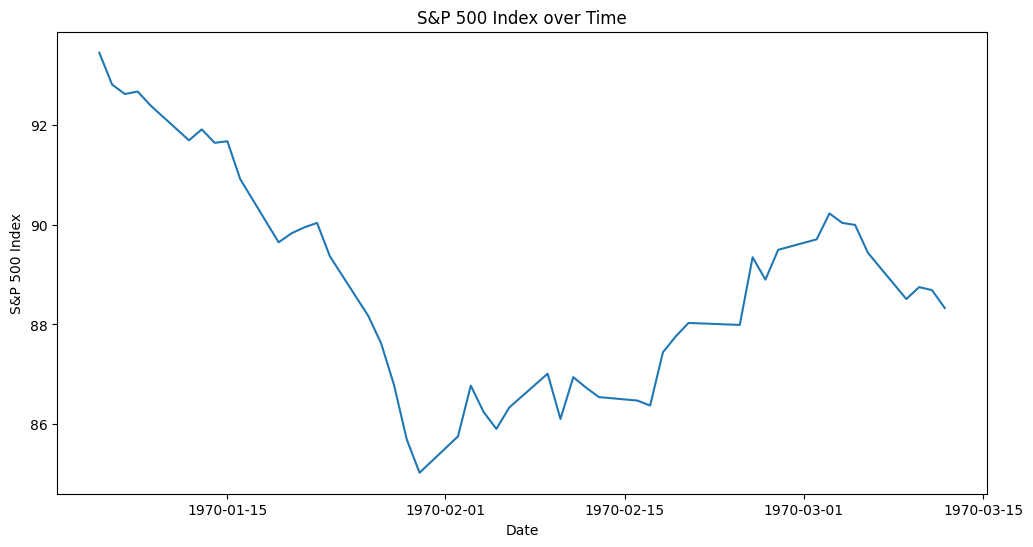

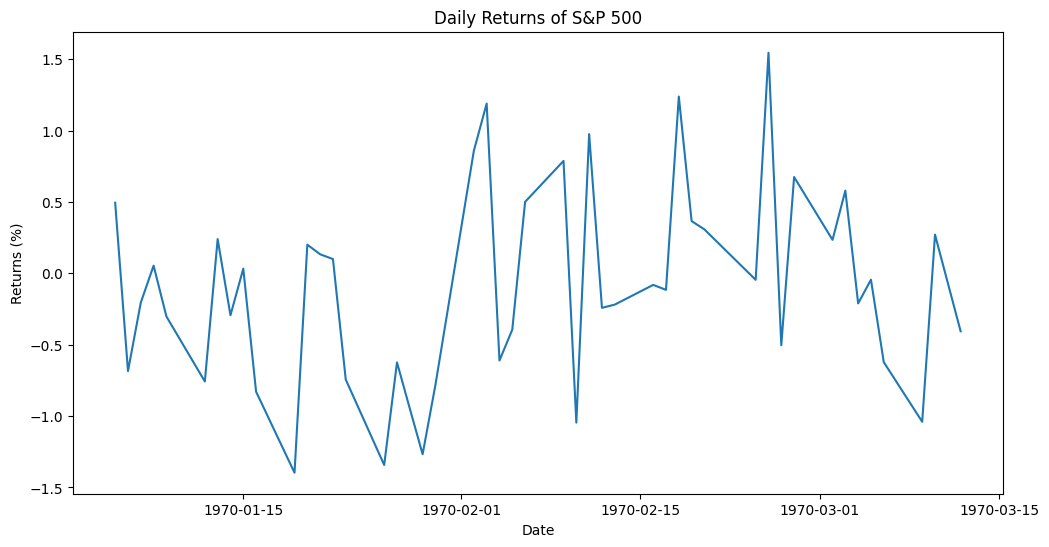

Engle's ARCH Test: test statistic = 3.7729065333793206, p-value = 0.9257134278937988
ARCH(1) Model Summary:
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -49.7563
Distribution:                  Normal   AIC:                           105.513
Method:            Maximum Likelihood   BIC:                           111.126
                                        No. Observations:                   48
Date:                Sat, Jan 18 2025   Df Residuals:                       47
Time:                        16:46:31   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
-----------------------------------

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch

# Load data
data = pd.read_excel('data/course4.xlsx')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Calculate returns and clean data
data['returns'] = data['sp500'].pct_change() * 100
data.dropna(inplace=True)  # Remove rows with NaN values

# Ensure no infinite values are present
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Plot the S&P 500 Index
plt.figure(figsize=(12, 6))
plt.plot(data['sp500'])
plt.title('S&P 500 Index over Time')
plt.xlabel('Date')
plt.ylabel('S&P 500 Index')
plt.show()

# Plot returns
plt.figure(figsize=(12, 6))
plt.plot(data['returns'])
plt.title('Daily Returns of S&P 500')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.show()

# Test for ARCH effects
test_stat, p_value, _, _ = het_arch(data['returns'])
print(f"Engle's ARCH Test: test statistic = {test_stat}, p-value = {p_value}")

# Fit ARCH and GARCH models
arch1 = arch_model(data['returns'], vol='Arch', p=1, q=0)
res_arch1 = arch1.fit(disp='off')
print("ARCH(1) Model Summary:")
print(res_arch1.summary())

arch2 = arch_model(data['returns'], vol='Arch', p=2, q=0)
res_arch2 = arch2.fit(disp='off')
print("ARCH(2) Model Summary:")
print(res_arch2.summary())

garch11 = arch_model(data['returns'], vol='Garch', p=1, q=1)
res_garch11 = garch11.fit(disp='off')
print("GARCH(1,1) Model Summary:")
print(res_garch11.summary())


# Analysis of results to choose the best model
print("\nModel Comparison:")
print(f"ARCH(1) AIC: {res_arch1.aic}, BIC: {res_arch1.bic}")
print(f"ARCH(2) AIC: {res_arch2.aic}, BIC: {res_arch2.bic}")
print(f"GARCH(1,1) AIC: {res_garch11.aic}, BIC: {res_garch11.bic}")

best_model = min([(res_arch1.aic, "ARCH(1)"), (res_arch2.aic, "ARCH(2)"), (res_garch11.aic, "GARCH(1,1)")], key=lambda x: x[0])
print(f"Based on AIC, the best model is {best_model[1]}.")

# Conclusion based on p-value and model fitness
if p_value < 0.05:
    print("There is evidence of volatility clustering.")
else:
    print("There is no significant evidence of volatility clustering.")

# Generate report details
print("\nConclusion:")
print("This analysis suggests volatility clustering in the S&P 500 returns, as indicated by significant ARCH effects.")
print("The GARCH(1,1) model generally provides a more comprehensive fit, accommodating the persistence in volatility observed in the financial data.")
